### Question 3
Pick any other dataset of your choice and use appropriate modeling (atleast
two different) of class conditional densities and compare their performance on
two different modeling.

In [1]:
from sklearn.datasets import fetch_california_housing
from seaborn_qqplot import pplot

In [2]:
data = fetch_california_housing(as_frame=True)

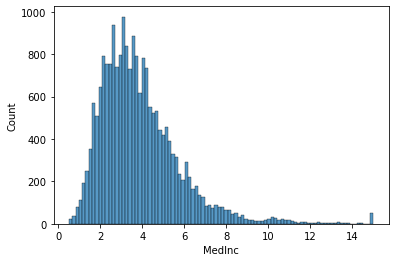

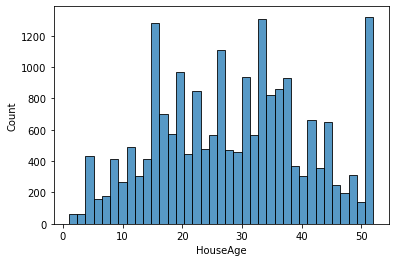

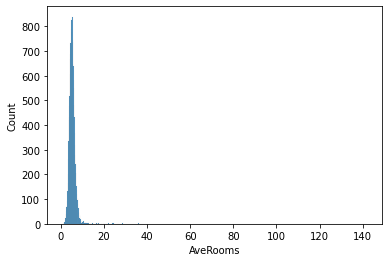

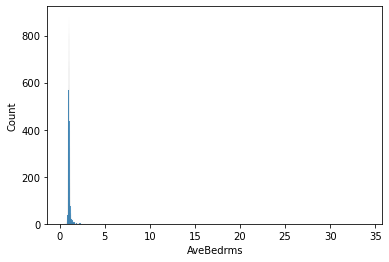

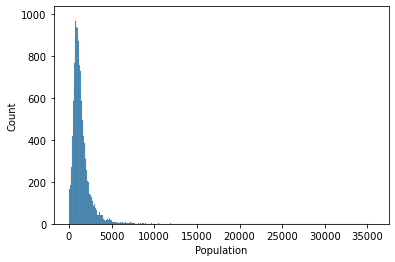

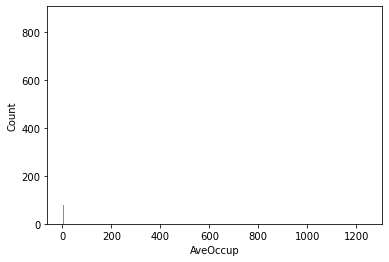

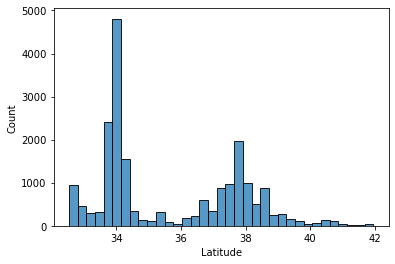

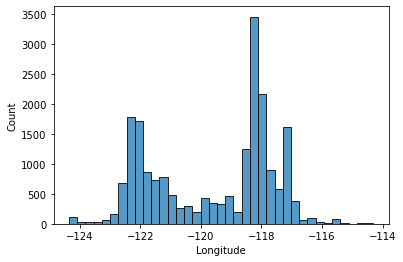

In [3]:
for col in data.data:
    sns.histplot(data.data[col])
    plt.show()

In [4]:
data.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [5]:
def getIndices(perc, safeCols="MedInc HouseAge Latitude Longitude".split()):
    idx = np.array([True]*len(data.data))
    for col in list(data.data):
        if col not in safeCols:
            p = np.percentile(data.data[col], perc)
            idx = idx & (data.data[col] < p)
    p = np.percentile(data.target, perc)
    idx = idx & (data.target < p)
    return idx

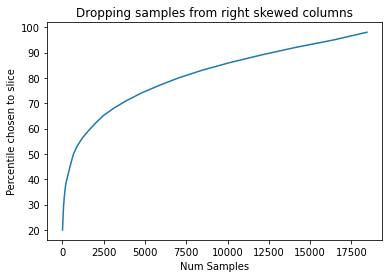

In [6]:
percentiles = range(20, 100, 3)
keepers = [getIndices(perc).sum() for perc in percentiles]
plt.plot(keepers, percentiles)
plt.xlabel('Num Samples')
plt.title("Dropping samples from right skewed columns")
plt.ylabel('Percentile chosen to slice');

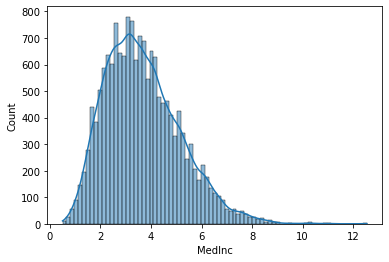

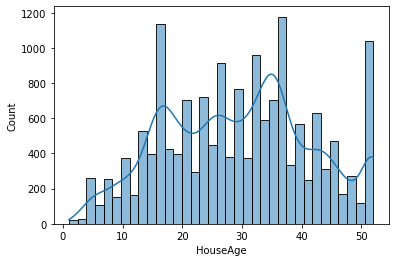

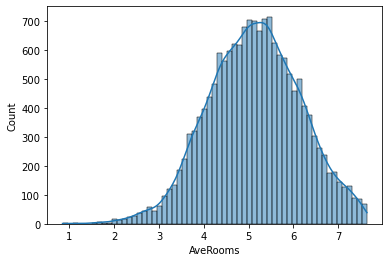

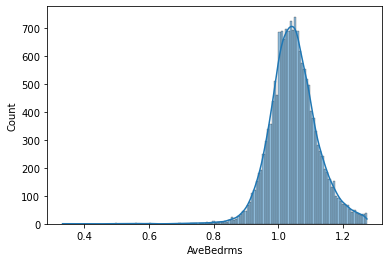

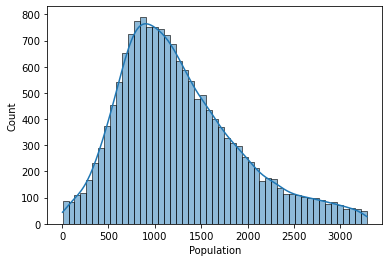

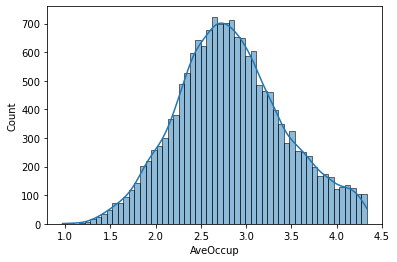

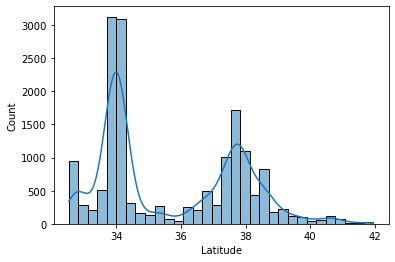

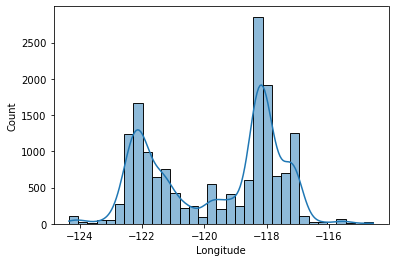

In [7]:
idx = getIndices(95)
newData = data.data[idx]
for col in data.data:
    sns.histplot(newData[col], kde=True)
    plt.show()

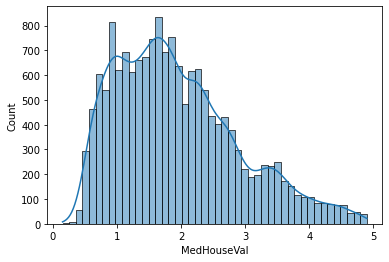

In [8]:
newTarget = data.target[idx]
sns.histplot(newTarget, kde=True);

c:\users\deepak h r\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


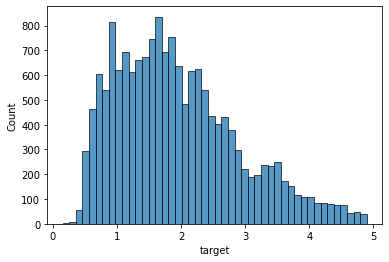

In [11]:
newData['target'] = newTarget#np.floor(list(newTarget * 4/5)).astype('uint8')
sns.histplot(newData['target'])
newData.to_csv('california.csv', index=False)